##**UTS BAGIAN B**

### **NAMA : RISKA ARUM M. S.**
### **NIM  : 4101422126**
### **MATA KULIAH : DATA MINING**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Pemanggilan data
data = pd.read_csv("/content/Titanic-Dataset.csv")

#**1. Eksplorasi Awal**

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# a. Jumlah total penumpang
total_passengers = len(data)
print("Jumlah total penumpang:", total_passengers)

Jumlah total penumpang: 891


In [7]:
# b. Jumlah penumpang yang selamat dan tidak selamat
survival_counts = data['Survived'].value_counts().rename(index={0: "Not Survived", 1: "Survived"})
print("\nJumlah penumpang yang selamat dan tidak selamat:")
print(survival_counts)


Jumlah penumpang yang selamat dan tidak selamat:
Survived
Not Survived    549
Survived        342
Name: count, dtype: int64


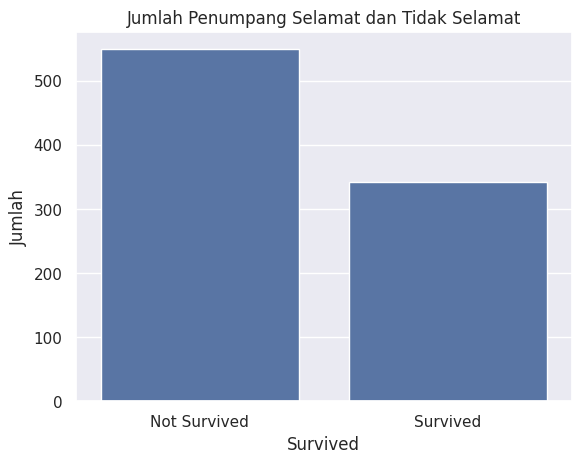

Status,Jumlah
Not Survived,549
Survived,342


In [8]:
# Visualisasi
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah')
plt.show()

# Tampilkan sebagai tabel HTML
survival_table = pd.DataFrame({
    'Status': survival_counts.index,
    'Jumlah': survival_counts.values
})

# Tampilkan dalam format HTML (Jupyter Notebook)
from IPython.display import display, HTML
display(HTML(survival_table.to_html(index=False)))

In [9]:
# c. Rata-rata umur, termuda, tertua
average_age = data['Age'].mean()
youngest = data.loc[data['Age'].idxmin()][['Name', 'Age']]
oldest = data.loc[data['Age'].idxmax()][['Name', 'Age']]

print("\nRata-rata umur penumpang:", round(average_age, 2))
print("Penumpang termuda:\n", youngest)
print("Penumpang tertua:\n", oldest)



Rata-rata umur penumpang: 29.7
Penumpang termuda:
 Name    Thomas, Master. Assad Alexander
Age                                0.42
Name: 803, dtype: object
Penumpang tertua:
 Name    Barkworth, Mr. Algernon Henry Wilson
Age                                     80.0
Name: 630, dtype: object


In [10]:
# d. Jumlah penumpang berdasarkan jenis kelamin
gender_counts = data['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(gender_counts)



Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


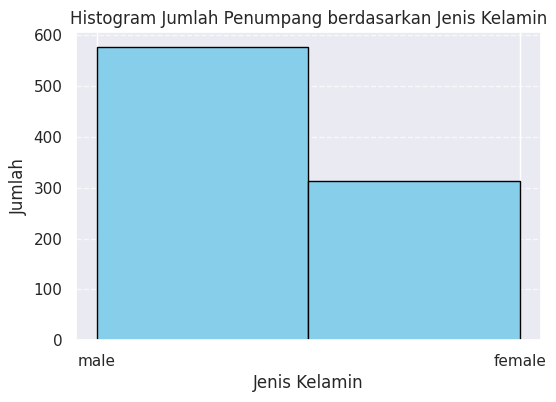

In [11]:
# Visualisasi
plt.figure(figsize=(6, 4))
plt.hist(data['Sex'], bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram Jumlah Penumpang berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
# e. Jumlah penumpang berdasarkan kelas dan persentase kelas 1
pclass_counts = data['Pclass'].value_counts().sort_index()
percent_class1 = (pclass_counts[1] / total_passengers) * 100

print("\nJumlah penumpang berdasarkan kelas:")
print(pclass_counts)
print("Persentase penumpang kelas 1:", round(percent_class1, 2), "%")



Jumlah penumpang berdasarkan kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Persentase penumpang kelas 1: 24.24 %


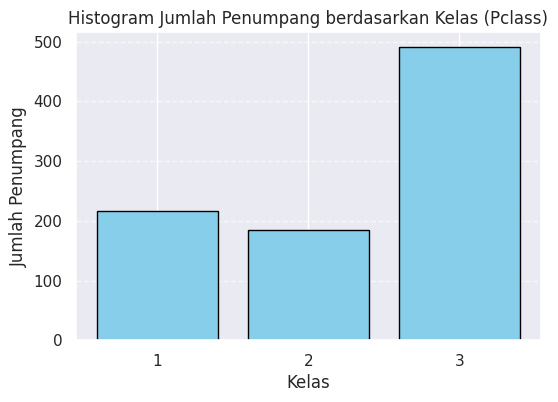

In [13]:
# Visualisasi
plt.figure(figsize=(6, 4))
plt.hist(data['Pclass'], bins=[0.5, 1.5, 2.5, 3.5], color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Histogram Jumlah Penumpang berdasarkan Kelas (Pclass)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.xticks([1, 2, 3])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **2. Preprocessing**

In [14]:
# Deteksi missing velue
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
data.isnull().sum().sum()

np.int64(866)

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Velues (blanks/ N/A (Python : nan atau NaN)) adalah kolom Age dan Cabin. Dengan jumlah seluruh Missing Velues adalah 866.

**1. Age**

In [17]:
# Handling Missing Velues
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

📌Asumsi terhadap kolom Age
- Kolom Age mengandung banyak missing value (nan), artinya banyak data umur penumpang yang tidak diketahui.
- Usia penumpang sangat bervariasi, mulai dari bayi (0.42 tahun) sampai lansia (80 tahun).
- Distribusi umur kemungkinan tidak normal (bisa ada outlier, misalnya usia sangat tua yang jarang).

💡 Penanganan missing velue Gunakan median karena:
- Median tidak terpengaruh nilai ekstrim (outlier) seperti mean.
- Karena usia manusia bisa sangat lebar distribusinya (bisa bayi, dewasa muda, orang tua), median lebih merepresentasikan usia "tengah" di populasi.
- Jadi, mengisi missing value Age dengan median membuat data tetap realistis dan tidak berat ke salah satu sisi.



In [18]:
# Cek nilai median usia
median_age = data['Age'].median()
print("Median Age:", median_age)

# Isi missing value Age dengan median
data['Age'].fillna(median_age, inplace=True)


Median Age: 28.0


<ipython-input-18-36fb705b6bf3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(median_age, inplace=True)


In [19]:
# Cek kembali jumlah missing value
np.sum(data['Age'].isnull())

np.int64(0)

**2. Cabin**

In [20]:
# Handling Missing Velues
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

📌Asumsi terhadap kolom Cabin
- Data Cabin berisi kode kabin di kapal (mungkin dari dataset Titanic).
- Nilai nan berarti penumpang tidak memiliki informasi kabin.

💡 Penanganan missing velue: mengisi missing velue dengan kategori baru seperti 'unknow' karena:
- Banyak sekali missing value di kolom ini.
- Kalau dihapus, kamu akan kehilangan terlalu banyak data.

In [21]:
# Mengisi missing value pada kolom 'Cabin' dengan 'Unknown'
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [22]:
# Mengecek kembali apakah masih ada missing value
print(data['Cabin'].isnull().sum())

0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


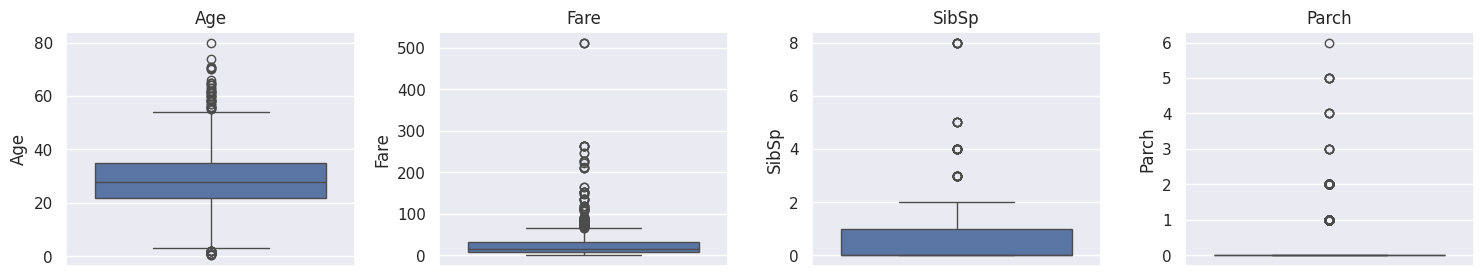

In [24]:
# Pengecekan Outlier menggunakan Bloxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [25]:
# Pengecekan Outlier menggunakan IDR

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"Kolom: {col}")
    print(f"  Jumlah Outlier: {outliers.shape[0]}")
    print("-" * 40)

Kolom: PassengerId
  Jumlah Outlier: 0
----------------------------------------
Kolom: Survived
  Jumlah Outlier: 0
----------------------------------------
Kolom: Pclass
  Jumlah Outlier: 0
----------------------------------------
Kolom: Age
  Jumlah Outlier: 66
----------------------------------------
Kolom: SibSp
  Jumlah Outlier: 46
----------------------------------------
Kolom: Parch
  Jumlah Outlier: 213
----------------------------------------
Kolom: Fare
  Jumlah Outlier: 116
----------------------------------------



**Definisi Outlier**
Menurut Hawkins (1980), outlier dapat didefenisikan sebagai amatan yang menyimpang sedemikian jauh dari pengamatan lainnya. Adanya data outlier ini dapat mempunyai efek bagi pengambilan suatu kesimpulan atau keputusan pada penelitian.  Outlier adalah pengamatan (data) yang memiliki nilai ekstrem, yaitu jauh berbeda dari mayoritas data lainnya dalam sebuah variabel. Dalam analisis statistik, outlier dapat menyebabkan distorsi terhadap parameter statistik seperti mean (rata-rata), standar deviasi, dan hasil model prediktif. Oleh karena itu, penting untuk mengidentifikasi dan menangani outlier secara tepat sesuai konteks.

**Hasil deteksi Outlier dalam Dataset**
Berdasarkan metode Interquartile Range (IQR) dan visualisasi boxplot, ditemukan beberapa outlier pada kolom-kolom numerik berikut:
1. Age
	Terdapat nilai ekstrem, terutama pada usia lanjut (misalnya lebih dari 70 tahun), meskipun valid, perlu perhatian khusus.
2. Fare
	Banyak nilai ekstrem terutama untuk tiket kelas 1 yang sangat mahal (bahkan di atas 500). Ini merupakan salah satu kolom dengan jumlah outlier terbanyak.
3. SibSp & Parch
  Jumlah anggota keluarga yang dibawa dalam perjalanan ada yang sangat tinggi (misalnya 5–6 orang), ini termasuk outlier karena sebagian besar penumpang bepergian sendiri atau dengan satu keluarga kecil.

In [43]:
# Import the winsorize function from scipy.stats.mstats
from scipy.stats.mstats import winsorize

# Winsorize kolom Age
age_array = data['Age'].values
age_winsorized = winsorize(age_array, limits=[0.05, 0.05])
data['Age'] = np.array(age_winsorized)

# Cek hasil
print(data['Age'].describe())

count    891.000000
mean      29.157127
std       11.728914
min        6.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       54.000000
Name: Age, dtype: float64


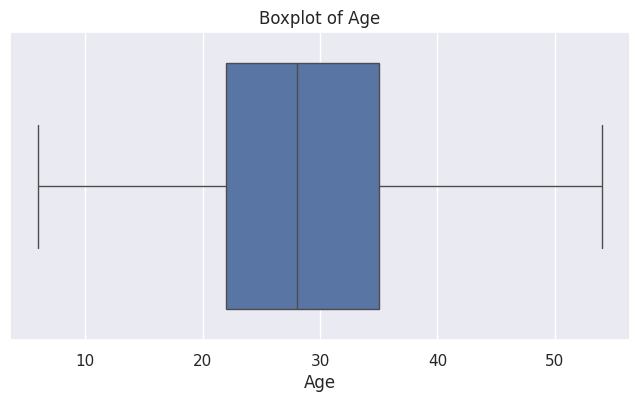

In [44]:
# Plot boxplot untuk kolom Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

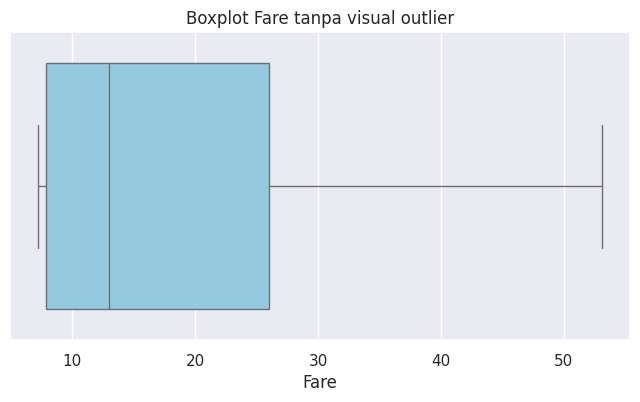

Jumlah data sebelum: 891
Jumlah data sesudah: 775


In [60]:
# Hapus outlier pakai IQR (whisker)
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data_clean = data[(data['Fare'] >= lower) & (data['Fare'] <= upper)]

# Tampilkan boxplot TANPA fliers (titik outlier)
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_clean['Fare'], color='skyblue', showfliers=False)
plt.title('Boxplot Fare tanpa visual outlier')
plt.show()

# Info
print(f"Jumlah data sebelum: {original_data.shape[0]}")
print(f"Jumlah data sesudah: {data_clean.shape[0]}")

In [56]:
# Transformasi log agar distribusi lebih normal
data['Fare_log'] = np.log1p(data['Fare'])  # log(1 + Fare)

# Hitung IQR di ruang log
Q1 = data['Fare_log'].quantile(0.25)
Q3 = data['Fare_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter baris yang bukan outlier
data_clean = data[(data['Fare_log'] >= lower) & (data['Fare_log'] <= upper)].copy()

# Drop kolom sementara
data_clean.drop(columns=['Fare_log'], inplace=True)

# Cek hasil
print(f"Jumlah data awal: {data.shape[0]}")
print(f"Jumlah data setelah penghapusan outlier Fare: {data_clean.shape[0]}")

Jumlah data awal: 891
Jumlah data setelah penghapusan outlier Fare: 891


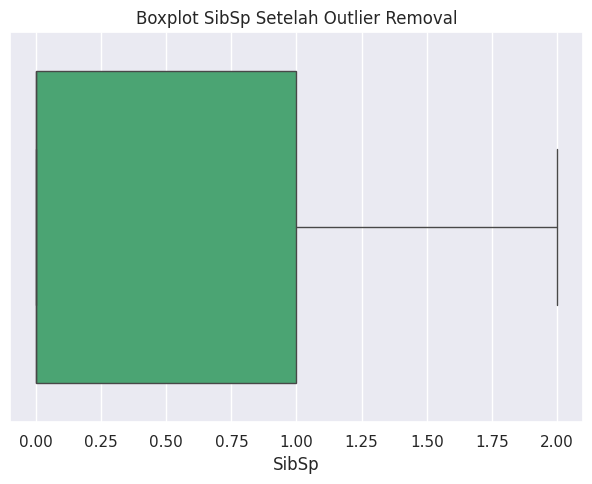

Jumlah data sebelum: 891
Jumlah data sesudah: 845


In [59]:
# IQR untuk SibSp
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
data_clean = data[(data['SibSp'] >= lower_bound) & (data['SibSp'] <= upper_bound)].copy()

# --- Visualisasi boxplot ---
plt.figure(figsize=(12, 5))

# Sesudah
plt.subplot(1, 2, 2)
sns.boxplot(x=data_clean['SibSp'], color='mediumseagreen')
plt.title('Boxplot SibSp Setelah Outlier Removal')

plt.tight_layout()
plt.show()

# Info
print(f"Jumlah data sebelum: {original_data.shape[0]}")
print(f"Jumlah data sesudah: {data_clean.shape[0]}")

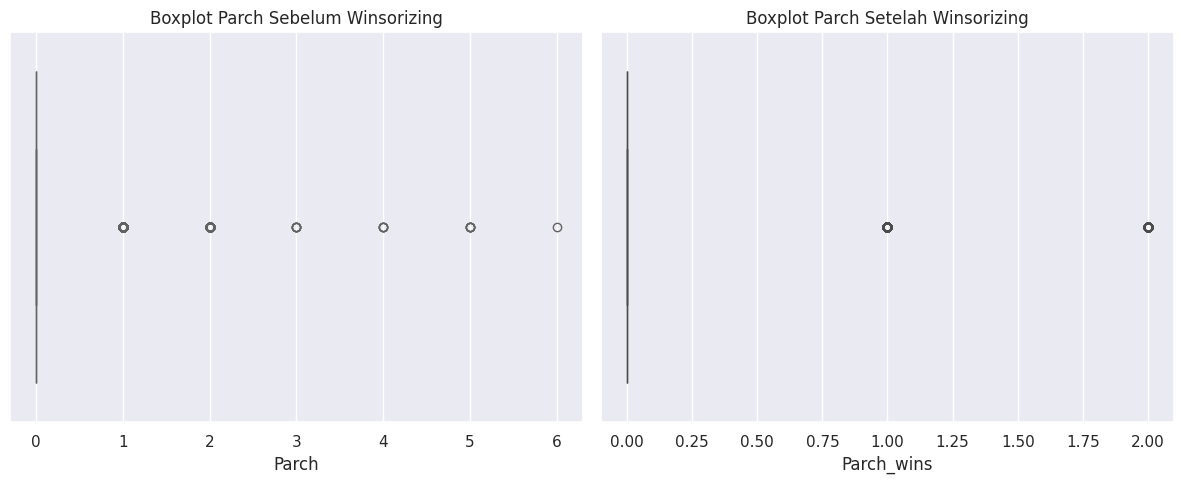

In [62]:
# Winsorizing kolom 'Parch' (1% dan 99%)
# Karena Parch diskrit dan banyak nol, winsorizing biasanya fokus ke atas
data['Parch_wins'] = winsorize(data['Parch'], limits=[0, 0.05])  # Hanya limit atas 5%

# --- Visualisasi Boxplot ---
plt.figure(figsize=(12, 5))

# Sebelum winsorizing
plt.subplot(1, 2, 1)
sns.boxplot(x=original_data['Parch'], color='tomato')
plt.title('Boxplot Parch Sebelum Winsorizing')

# Setelah winsorizing
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Parch_wins'], color='mediumspringgreen')
plt.title('Boxplot Parch Setelah Winsorizing')

plt.tight_layout()
plt.show()

# Opsional: Simpan data bersih tanpa kolom duplikat
data_clean = data.drop(columns=['Parch', 'Parch_wins'])
data['Parch'] = data['Parch_wins']
data.drop(columns=['Parch_wins'], inplace=True)

In [64]:
# --- Transformasi ---
# 1. Log transform untuk Fare
data['Fare_log'] = np.log1p(data['Fare'])  # log(1 + Fare)

# 2. Scaling kolom Fare_log, SibSp, Parch
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Fare_log', 'SibSp', 'Parch']])

# 3. Masukkan hasil ke DataFrame baru
scaled_df = pd.DataFrame(scaled_features, columns=['Fare_scaled', 'SibSp_scaled', 'Parch_scaled'])

# Gabungkan ke data asli (atau bisa pisah kalau untuk modeling)
data_scaled = pd.concat([data, scaled_df], axis=1)

# Cek hasil
print(data_scaled[['Fare', 'Fare_log', 'Fare_scaled', 'SibSp', 'SibSp_scaled', 'Parch', 'Parch_scaled']].head())

      Fare  Fare_log  Fare_scaled  SibSp  SibSp_scaled  Parch  Parch_scaled
0   7.2500  2.110213    -1.039881      1      0.432793      0     -0.521469
1  71.2833  4.280593     1.568741      1      0.432793      0     -0.521469
2   7.9250  2.188856    -0.945358      0     -0.474545      0     -0.521469
3  53.1000  3.990834     1.220474      1      0.432793      0     -0.521469
4   8.0500  2.202765    -0.928641      0     -0.474545      0     -0.521469


In [74]:
# Log Transformasi kolom Fare
data['Fare_log'] = np.log1p(data['Fare'])  # log(1 + Fare)

# Scaling kolom numerik (Fare_log, SibSp, Parch)
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(data[['Fare_log', 'SibSp', 'Parch']])
scaled_df = pd.DataFrame(scaled_cols, columns=['Fare_scaled', 'SibSp_scaled', 'Parch_scaled'])

# Encoding kolom kategorik
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex_encoded'] = label_encoder.fit_transform(data['Sex'])      # male=1, female=0
data['Embarked_encoded'] = label_encoder.fit_transform(data['Embarked'])

# One-hot encoding for 'Name', 'Cabin', 'Ticket', and 'Embarked'
# Import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for DataFrame output

# Fit and transform on categorical columns
encoded_data = encoder.fit_transform(data[['Name', 'Cabin', 'Ticket', 'Embarked']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Name', 'Cabin', 'Ticket', 'Embarked']))

# Gabungkan semua fitur yang dibutuhkan
final_data = pd.concat([
    data[['Survived', 'Age', 'Sex_encoded']],  # target + non-scaled numerik
    scaled_df,                                                   # scaled numerik
    encoded_df                                                 # one-hot encoded features
], axis=1)

# Final cek
print("Shape data akhir:", final_data.shape)
print(final_data.head())

Shape data akhir: (891, 1730)
   Survived   Age  Sex_encoded  Fare_scaled  SibSp_scaled  Parch_scaled  \
0         0  22.0            1    -1.039881      0.432793     -0.521469   
1         1  38.0            0     1.568741      0.432793     -0.521469   
2         1  26.0            0    -0.945358     -0.474545     -0.521469   
3         1  35.0            0     1.220474      0.432793     -0.521469   
4         0  35.0            1    -0.928641     -0.474545     -0.521469   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                       0.0                               0.0   
1                       0.0                               0.0   
2                       0.0                               0.0   
3                       0.0                               0.0   
4                       0.0                               0.0   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelson, Mr. Samuel  ...  \
0                                    0.0             

# **3. Modeling**

**a. Mengapa perlu membagi data menjadi training dan testing?**

📌 Tujuan utama membagi data:
- Untuk melatih model pada sebagian data (training set) dan
- Untuk mengukur performa nyata model pada data yang belum pernah dilihat (testing set)

📌Jika tidak dibagi: Model bisa hafal data (overfitting) dan hasilnya tidak bisa dipercaya di dunia nyata

**b. Berapa persen pembagiannya?**
📌 Persentase yang digunakan:
- 80% training — 20% testing atau
- 70% training — 30% testing

Alasan:
80/20 cukup untuk model belajar dari banyak data tapi masih menyisakan data tes yang cukup mewakili untuk evaluasi

**c. Membuat tiga model klasifikasi: LR, KNN, dan RF**
- Logistic Regression (LR) – model statistik klasik untuk klasifikasi biner. Menggunakan fungsi sigmoid → memetakan input ke probabilitas 0–1
- K-Nearest Neighbors (KNN) – model berdasarkan jarak tetangga terdekat. Memprediksi kelas berdasarkan mayoritas dari K tetangga terdekat
- Random Forest (RF) – model ensemble berbasis banyak decision tree. Menggabungkan banyak pohon keputusan untuk mengurangi overfitting dan meningkatkan akurasi





In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pisahkan fitur dan target
X = final_data.drop(columns='Survived') # Use final_data here
y = final_data['Survived']

# a & b: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [76]:
# Model 1 - Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
# Model 2 - KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
# Model 3 - Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Evaluasi
for name, model in zip(['Logistic Regression', 'KNN', 'Random Forest'],
                       [model_lr, model_knn, model_rf]):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Akurasi:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Logistic Regression
Akurasi: 0.8045
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Model: KNN
Akurasi: 0.7095
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       110
           1       0.66      0.51      0.57        69

    accuracy                           0.71       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.71      0.70       179


Model: Random Forest
Akurasi: 0.8324
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69



**d. Membandingkan hasil dari ketiga model**

Dari ketiga model tersebut, dieperoleh perbandingan akurasi model:
1. Random Fores
Akurasi: 0,8324 dan F1-score: 0,77
2. Logistic Regression
AkurasiL 0,8045 dan F1-score: 0.74
3. KNN
Akurasi: 0,7095 dan F1-score: 0,57

Maka, model yang paling bagus adalah model RF, dengan

Akurasi tertinggi (83.2%)

Precision & Recall untuk kelas “1” (orang selamat) juga paling seimbang

F1-score kelas 1 tertinggi (0.77)


**Alasan:**
- Model ensemble: Random Forest terdiri dari banyak decision tree → hasil voting → lebih stabil, tidak mudah overfitting.
- Non-linear: Bisa menangani relasi yang kompleks antar fitur.
- Robust terhadap outlier & noise: Cocok karena dataset Titanic sempat punya outlier yang sulit dihilangkan sepenuhnya.
- Feature importance: Random Forest mampu menilai fitur mana yang paling berkontribusi terhadap prediksi.

**Kesimpulan:**
Random Forest adalah model terbaik untuk dataset Titanic ini, karena dia memberikan akurasi tertinggi, dan juga balance antara precision & recall untuk kelas “selamat” yang penting dalam konteks keselamatan penumpang.




# **4. Evaluasi**

a. Precision dan Recall untuk penumpang selamat (kelas 1)
Class 1 (selamat):
- Precision = 0.81
- Recall    = 0.74

Artinya:
- Precision 0.81 → Dari semua yang diprediksi selamat, 81% memang benar-benar selamat.
- Recall 0.74 → Dari semua penumpang yang benar-benar selamat, 74% berhasil dikenali oleh model.



In [80]:
#  b. Jumlah penumpang yang diprediksi selamat dan yang benar-benar selamat
y_pred_rf = model_rf.predict(X_test)

# Total diprediksi selamat (kelas 1)
pred_selamat = (y_pred_rf == 1).sum()

# Dari prediksi itu, berapa yang benar-benar selamat
true_selamat = ((y_pred_rf == 1) & (y_test == 1)).sum()

print("Diprediksi selamat:", pred_selamat)
print("Benar-benar selamat:", true_selamat)


Diprediksi selamat: 63
Benar-benar selamat: 51


Artinya:
- Model memprediksi ada 74 penumpang yang selamat
- Dari jumlah itu, 51 benar-benar selamat
- Sisanya (23 orang) adalah false positive (diprediksi selamat, padahal tidak)